In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_excel('data/egatur_murcia.xlsx')

In [4]:
df.head()

,AÑO,MES,PERNOCTACIONES,GASTO_TOTAL
0,2015,10,1495,88559644.54
1,2015,11,964,17492803.54
2,2015,12,1271,20185585.75
3,2016,1,1438,34715238.28
4,2016,2,996,32151186.84


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AÑO             96 non-null     int64  
 1   MES             96 non-null     int64  
 2   PERNOCTACIONES  96 non-null     int64  
 3   GASTO_TOTAL     96 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 3.1 KB


In [6]:
df['gasto_por_pernoctacion'] = df['GASTO_TOTAL'] / df['PERNOCTACIONES']

print(df.head())

    AÑO  MES  PERNOCTACIONES  GASTO_TOTAL  gasto_por_pernoctacion
0  2015   10            1495  88559644.54            59237.220428
1  2015   11             964  17492803.54            18146.061763
2  2015   12            1271  20185585.75            15881.656766
3  2016    1            1438  34715238.28            24141.333992
4  2016    2             996  32151186.84            32280.308072


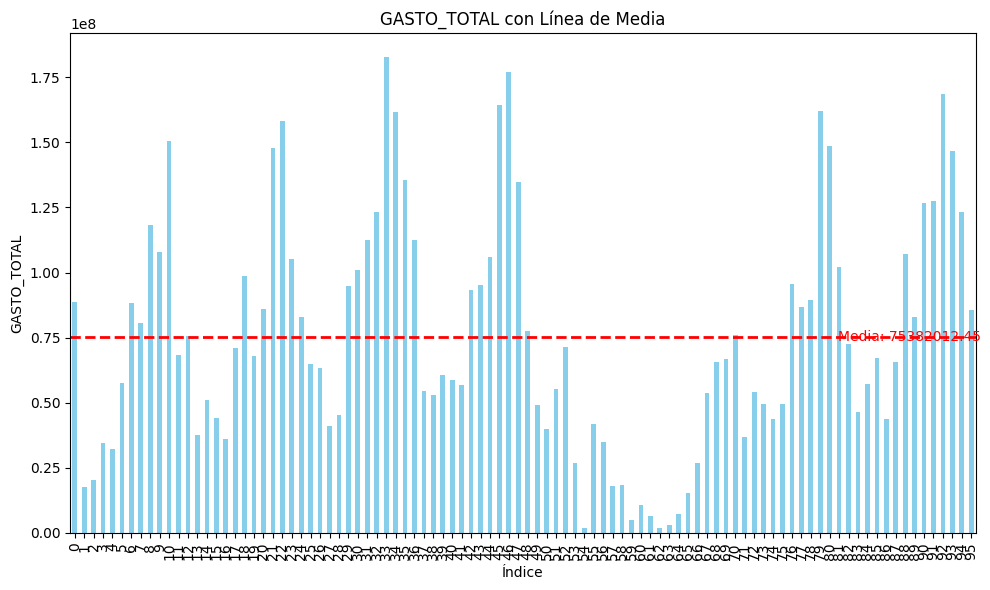

In [7]:
# Calcula la media de 'GASTO_TOTAL'
media_gasto_total = df['GASTO_TOTAL'].mean()

# Crea un gráfico de barras para 'GASTO_TOTAL'
plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño según tus necesidades
df['GASTO_TOTAL'].plot(kind='bar', color='skyblue')

# Dibuja una línea horizontal en la media
plt.axhline(media_gasto_total, color='red', linewidth=2, linestyle='--')

# Añade una etiqueta para la línea de la media
plt.text(len(df), media_gasto_total, f'Media: {media_gasto_total:.2f}', color='red', va='center', ha='right')

# Añade títulos y etiquetas
plt.title('GASTO_TOTAL con Línea de Media')
plt.xlabel('Índice')
plt.ylabel('GASTO_TOTAL')

# Muestra el gráfico
plt.tight_layout()
plt.show()


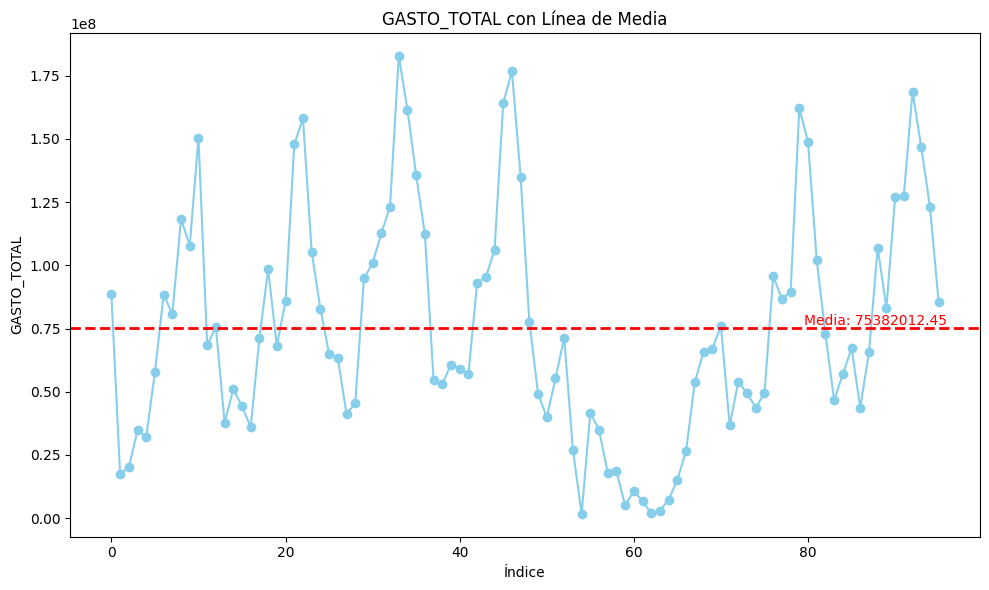

In [9]:
# Calcula la media de 'GASTO_TOTAL'
media_gasto_total = df['GASTO_TOTAL'].mean()

# Crea un gráfico de líneas para 'GASTO_TOTAL'
plt.figure(figsize=(10, 6))  # Ajusta el tamaño según tus necesidades
df['GASTO_TOTAL'].plot(kind='line', color='skyblue', marker='o', linestyle='-')

# Dibuja una línea horizontal en la media
plt.axhline(media_gasto_total, color='red', linewidth=2, linestyle='--')

# Añade una etiqueta para la línea de la media
plt.text(len(df), media_gasto_total, f'Media: {media_gasto_total:.2f}', color='red', va='bottom', ha='right')

# Añade títulos y etiquetas
plt.title('GASTO_TOTAL con Línea de Media')
plt.xlabel('Índice')
plt.ylabel('GASTO_TOTAL')

# Muestra el gráfico
plt.tight_layout()
plt.show()


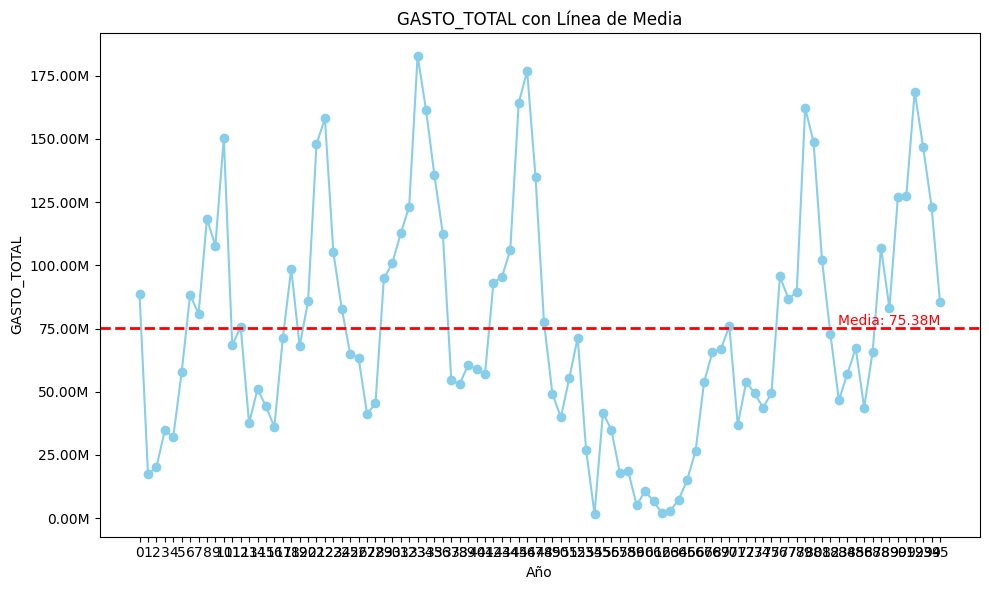

In [10]:
from matplotlib.ticker import FuncFormatter
# Asumiendo que 'df' es tu DataFrame y 'GASTO_TOTAL' es el nombre de tu columna

# Convierte el índice de tu DataFrame a una columna de año si aún no lo has hecho
# df.reset_index(inplace=True)
# df.rename(columns={'index': 'Año'}, inplace=True)

# Calcula la media de 'GASTO_TOTAL'
media_gasto_total = df['GASTO_TOTAL'].mean()

# Crea un gráfico de líneas para 'GASTO_TOTAL'
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['GASTO_TOTAL'], marker='o', linestyle='-', color='skyblue')

# Añade una etiqueta para la línea de la media
plt.axhline(media_gasto_total, color='red', linewidth=2, linestyle='--')
plt.text(len(df)-1, media_gasto_total, f'Media: {media_gasto_total/1e6:.2f}M', color='red', va='bottom', ha='right')

# Formatear el eje Y para mostrar 'M' para millones
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Establece el rango del eje X para incluir todos los años y etiquétalos adecuadamente
plt.xticks(range(df.index.min(), df.index.max() + 1), range(df.index.min(), df.index.max() + 1))

# Añade títulos y etiquetas
plt.title('GASTO_TOTAL con Línea de Media')
plt.xlabel('Año')
plt.ylabel('GASTO_TOTAL')

# Muestra el gráfico
plt.tight_layout()
plt.show()

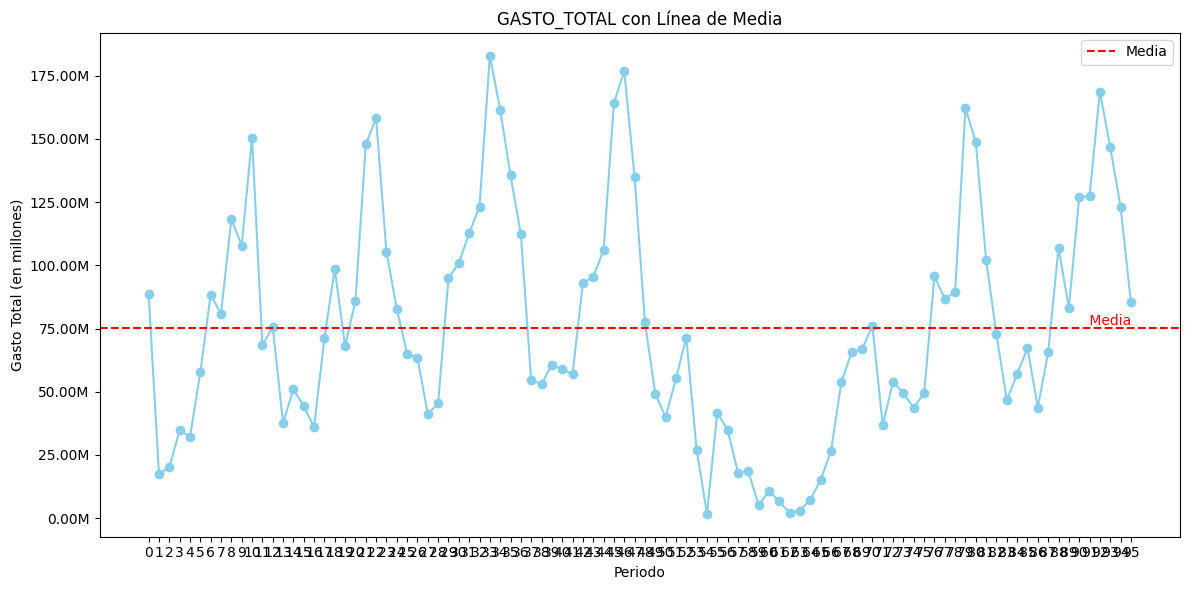

In [11]:

### from matplotlib.ticker import FuncFormatter

# Función para formatear el eje Y como "X.XXM"
def millions(x, pos):
    return '%1.2fM' % (x * 1e-6)

# Asigna el formateador al eje Y
formatter = FuncFormatter(millions)

# Suponiendo que df es tu DataFrame de pandas
# Asegúrate de que 'periodo' sea el índice y sea de tipo int o datetime si contiene años
# df.set_index('periodo', inplace=True)

# Calcula la media de GASTO_TOTAL
gasto_total_media = df['GASTO_TOTAL'].mean()

# Crea el gráfico de líneas para GASTO_TOTAL
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GASTO_TOTAL'], marker='o', linestyle='-', color='skyblue')

# Añade la línea de la media
plt.axhline(gasto_total_media, color='red', linestyle='--', label='Media')

# Añade la etiqueta de la media
plt.text(df.index[-1], gasto_total_media, ' Media', color='red', va='bottom', ha='right')

# Formatea el eje Y
plt.gca().yaxis.set_major_formatter(formatter)

# Formatea el eje X si 'periodo' es el índice y está en el formato adecuado
# Si el índice no está en el formato adecuado, puedes ajustar los ticks así:
plt.xticks(ticks=range(df.index.min(), df.index.max() + 1), labels=range(df.index.min(), df.index.max() + 1))

# Añade títulos y etiquetas
plt.title('GASTO_TOTAL con Línea de Media')
plt.xlabel('Periodo')
plt.ylabel('Gasto Total (en millones)')

# Muestra la leyenda
plt.legend()

# Ajusta el layout y muestra el gráfico
plt.tight_layout()
plt.show()


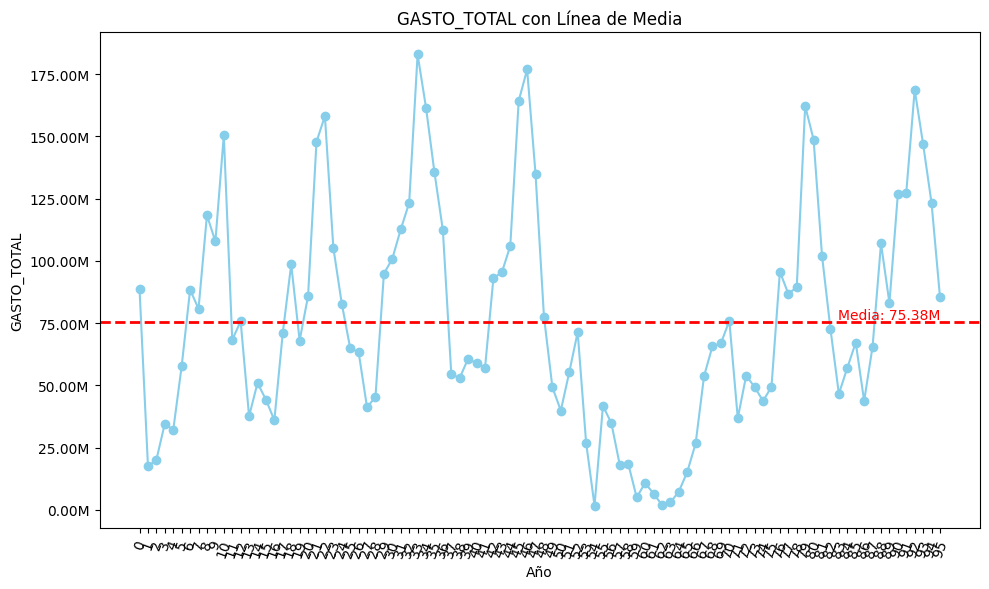

In [12]:

# Asumiendo que 'df' es tu DataFrame y 'GASTO_TOTAL' es el nombre de tu columna

# Calcula la media de 'GASTO_TOTAL'
media_gasto_total = df['GASTO_TOTAL'].mean()

# Crea un gráfico de líneas para 'GASTO_TOTAL'
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['GASTO_TOTAL'], marker='o', linestyle='-', color='skyblue')

# Añade una etiqueta para la línea de la media
plt.axhline(media_gasto_total, color='red', linewidth=2, linestyle='--')
plt.text(len(df)-1, media_gasto_total, f'Media: {media_gasto_total/1e6:.2f}M', color='red', va='bottom', ha='right')

# Formatear el eje Y para mostrar 'M' para millones
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Establece las etiquetas del eje X y rota las etiquetas a 70 grados
plt.xticks(range(df.index.min(), df.index.max() + 1), range(df.index.min(), df.index.max() + 1), rotation=70)

# Añade títulos y etiquetas
plt.title('GASTO_TOTAL con Línea de Media')
plt.xlabel('Año')
plt.ylabel('GASTO_TOTAL')

# Muestra el gráfico
plt.tight_layout()
plt.show()


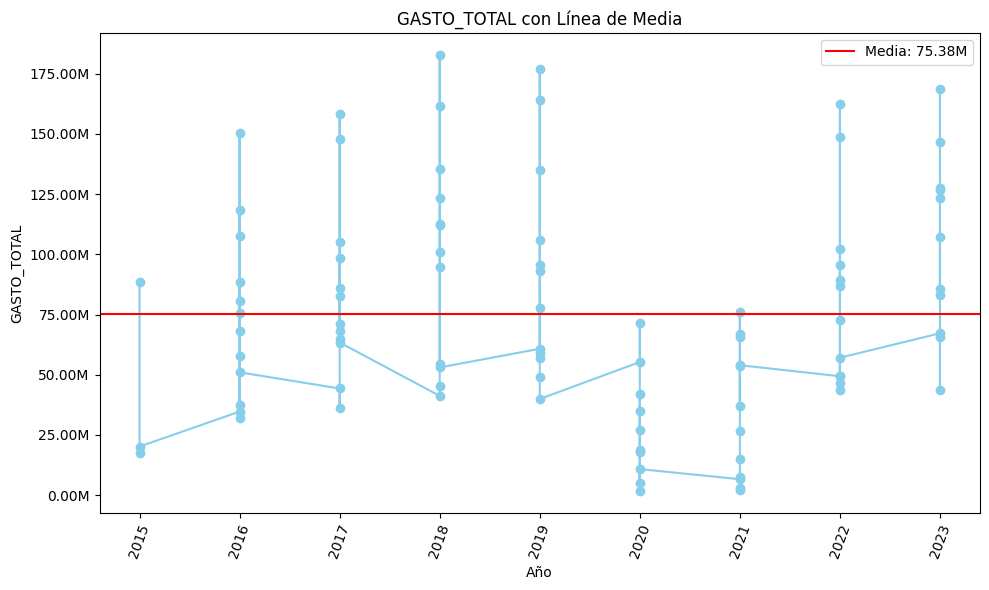

In [13]:


# Asegurándonos de que 'año' es una columna y es de tipo adecuado
df['AÑO'] = pd.to_numeric(df['AÑO'], errors='coerce')

# Calculamos la media de 'GASTO_TOTAL'
media_gasto_total = df['GASTO_TOTAL'].mean()

# Creamos el gráfico de líneas para 'GASTO_TOTAL' utilizando 'año' como eje X
plt.figure(figsize=(10, 6))
plt.plot(df['AÑO'], df['GASTO_TOTAL'], marker='o', linestyle='-', color='skyblue')

# Añadimos una línea horizontal para la media
plt.axhline(y=gasto_total_media, color='r', linestyle='-', label=f'Media: {gasto_total_media/1e6:.2f}M')

# Ajustamos las etiquetas del eje Y para mostrar 'M' para millones
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# Ajustamos las etiquetas del eje X para que solo aparezcan los años
# Obtenemos los años únicos y los usamos como ticks del eje X
años_unicos = df['AÑO'].unique()
plt.xticks(años_unicos, rotation=70)

# Añadimos título y etiquetas
plt.title('GASTO_TOTAL con Línea de Media')
plt.xlabel('Año')
plt.ylabel('GASTO_TOTAL')

# Mostramos la leyenda
plt.legend()

# Mostramos el gráfico
plt.tight_layout()
plt.show()
